In [646]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import sklearn

In [647]:
market_data_no_outliers = pd.read_csv('master_db_no_outliers.csv')

In [648]:
# clean_market_data

### Deal with outliers

In [649]:
# # Calculate the z-score for each data point
# clean_market_data['z_score'] = np.abs((clean_market_data['converted_price'] - np.mean(clean_market_data['converted_price'])) / np.std(clean_market_data['converted_price']))
#
# clean_market_data
# market_data_no_outliers = clean_market_data[clean_market_data['z_score'] < 3]
# print(clean_market_data.shape, market_data_no_outliers.shape, f'=> {74911 - 74820} data points removed')
# market_data_no_outliers.to_csv('master_db_no_outliers.csv')

In [650]:
market_data_no_outliers

,Unnamed: 0.1,Unnamed: 0,time_sold,horse_id,genotype,bloodline,breed_type,color,birthday,super_coat,...,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third,converted_price,day_sold,z_score
0,15,15,1.671901e+09,270,Z1,Nakamoto,genesis,Rosy Brown,2019-03-02T09:29:40,False,...,24.63,1.760085,3.59,34,946,79,120,3046.15000,2022-12-24,2.345064
1,24,24,1.663184e+09,501,Z2,Nakamoto,genesis,Electric Violet,2019-03-15T12:08:00,False,...,22.87,0.091390,5.38,12,223,16,23,3093.96000,2022-09-14,2.384025
2,25,25,1.663610e+09,501,Z2,Nakamoto,genesis,Electric Violet,2019-03-15T12:08:00,False,...,22.87,0.091390,5.38,12,223,16,23,1801.86500,2022-09-19,1.331101
3,28,28,1.673439e+09,545,Z2,Nakamoto,genesis,Papaya Whip,2019-03-17T07:05:34,False,...,20.74,0.733313,2.82,23,815,62,84,1792.11150,2023-01-11,1.323153
4,37,37,1.655247e+09,644,Z2,Nakamoto,genesis,Brown Sugar,2019-03-20T11:32:57,False,...,24.37,0.143701,4.30,12,279,25,31,3337.74900,2022-06-14,2.582687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74384,74761,74761,1.673462e+09,519821,Z268,Buterin,cross,Cosmic Cobalt,2023-01-07T19:47:54,False,...,0.00,0.000000,0.00,0,8,0,0,1.38913,2023-01-11,0.136101
74385,74762,74762,1.673563e+09,519849,Z17,Buterin,elite,Oval Orchid,2023-01-07T22:27:17,False,...,18.18,0.000000,9.09,1,11,1,0,23.34585,2023-01-12,0.118208
74386,74763,74763,1.673312e+09,519892,Z12,Finney,exclusive,Midnight Black,2023-01-08T03:01:52,False,...,29.91,0.229800,13.08,14,107,11,7,66.24200,2023-01-09,0.083252
74387,74764,74764,1.673477e+09,519901,Z6,Szabo,exclusive,Dark Moss,2023-01-08T04:15:02,False,...,23.19,0.056379,8.70,6,69,6,4,11.20592,2023-01-11,0.128101


## Exploratory Data Analysis

### Price Distribution

In [651]:
# sns.boxplot(data = market_data_no_outliers, x='converted_price', color='red')
# plt.xlim(0,20000)
# plt.ylim(0,80)

The distribution of prices is highly right skewed.

### Win rate vs Price

In [652]:
# sns.scatterplot(data=market_data_no_outliers, x='win_rate', y='converted_price')

### Different Factors by Breed

In [653]:
by_breed = market_data_no_outliers.groupby('breed_type').mean().reset_index()
by_breed

C:\Users\dgnic\AppData\Local\Temp\ipykernel_41856\2959402490.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_breed = market_data_no_outliers.groupby('breed_type').mean().reset_index()


,breed_type,Unnamed: 0.1,Unnamed: 0,time_sold,horse_id,super_coat,mother,father,free_win_rate,paid_win_rate,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third,converted_price,z_score
0,cross,51610.575969,51610.575969,1.662909e+09,416312.150826,0.011761,284935.210108,294491.871742,5.888686,1.907812,19.312311,0.028182,5.618649,8.681341,106.407184,8.510966,8.468373,20.078084,0.125501
1,elite,45156.301463,45156.301463,1.661447e+09,387200.217384,0.011446,235481.718158,222533.164802,7.178207,3.123271,22.790164,0.066909,6.794897,15.042771,176.305422,14.992857,14.884509,31.889489,0.118140
2,exclusive,35696.286663,35696.286663,1.659331e+09,333594.173334,0.012631,159520.259636,92669.891201,7.620131,3.718447,24.090492,0.137964,7.192714,23.388437,267.932164,22.976927,22.892314,84.858425,0.121940
3,genesis,2617.133996,2617.133996,1.660587e+09,21897.416488,0.000000,0.000000,0.000000,7.340878,4.093276,22.616439,0.214878,6.499659,24.660580,287.462137,24.845059,24.577336,539.718844,0.338801
4,legendary,31485.552013,31485.552013,1.658653e+09,298353.971044,0.022786,14577.697012,12923.873187,7.750761,3.740246,24.599530,0.170139,7.188440,25.386989,294.575179,26.212546,26.362849,189.491619,0.160817
5,pacer,51044.815166,51044.815166,1.661643e+09,415614.001215,0.022968,259706.924535,313375.999635,2.594986,0.688643,10.066278,0.009770,2.519611,2.480860,53.962571,2.924778,3.225665,12.139662,0.128471


Text(0.5, 1.0, 'Mean Win Rate by Breed Type')

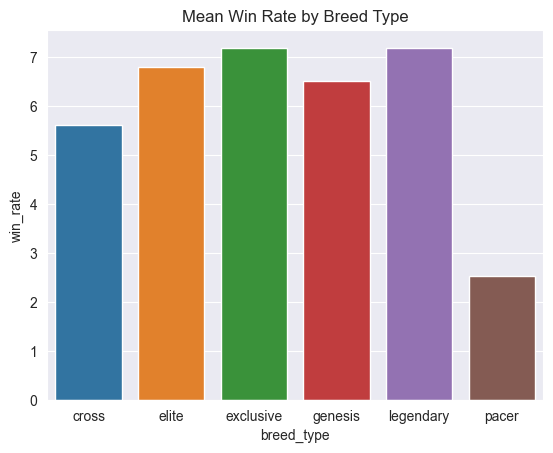

In [654]:
sns.barplot(data=by_breed, x='breed_type', y='win_rate')
plt.title('Mean Win Rate by Breed Type')

Text(0.5, 1.0, 'Mean Number of 1st Place Finishes by Breed')

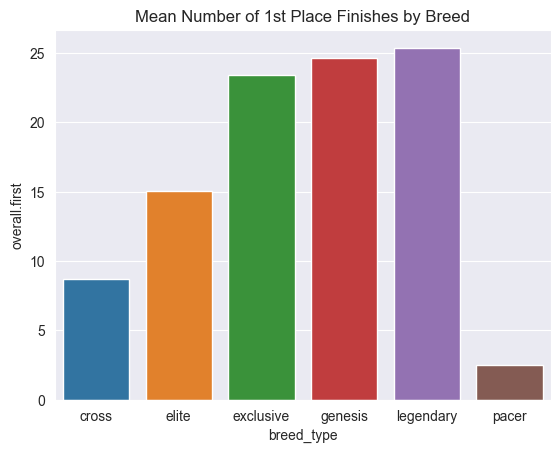

In [655]:
sns.barplot(data=by_breed, x='breed_type', y='overall.first')
plt.title('Mean Number of 1st Place Finishes by Breed')

<AxesSubplot: xlabel='breed_type', ylabel='converted_price'>

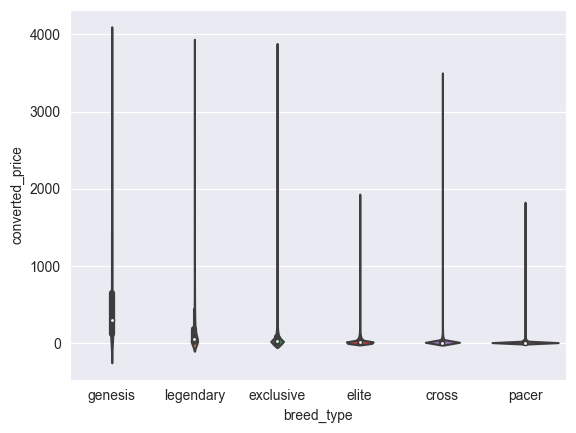

In [656]:
sns.violinplot(data=market_data_no_outliers, x='breed_type', y='converted_price')

### Different Factors by Bloodline

In [657]:
by_blood = market_data_no_outliers.groupby('bloodline').median().reset_index()
by_blood

C:\Users\dgnic\AppData\Local\Temp\ipykernel_41856\3581750718.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.median is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  by_blood = market_data_no_outliers.groupby('bloodline').median().reset_index()


,bloodline,Unnamed: 0.1,Unnamed: 0,time_sold,horse_id,super_coat,mother,father,free_win_rate,paid_win_rate,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third,converted_price,z_score
0,Buterin,37279.0,37279.0,1.659483e+09,395861.0,0.0,108305.0,61166.0,4.62,0.0,20.00,0.002160,4.55,3.0,66.0,4.0,5.0,10.019912,0.129833
1,Finney,35613.5,35613.5,1.658958e+09,390232.0,0.0,87904.0,24033.0,6.93,0.0,24.65,0.010128,6.71,8.0,129.0,11.0,12.0,17.789414,0.125760
2,Nakamoto,40154.0,40154.0,1.659393e+09,406307.0,0.0,71197.0,23217.0,7.66,0.0,26.32,0.030438,7.21,12.0,174.0,16.0,17.0,99.230000,0.102823
3,Szabo,35765.0,35765.0,1.659119e+09,390789.0,0.0,72062.0,20817.0,7.46,0.0,25.58,0.020969,7.16,11.0,166.0,15.0,16.0,42.779016,0.114264


(array([0, 1, 2, 3]),
 [Text(0, 0, 'Buterin'),
  Text(1, 0, 'Finney'),
  Text(2, 0, 'Nakamoto'),
  Text(3, 0, 'Szabo')])

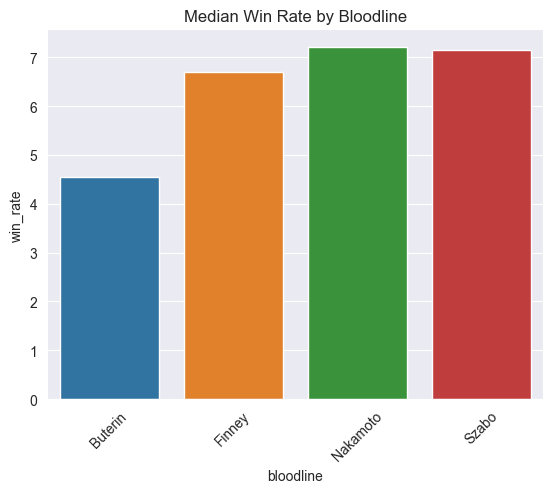

In [658]:
sns.barplot(data=by_blood, x='bloodline', y='win_rate')
plt.title('Median Win Rate by Bloodline')
plt.xticks(rotation = 45)

C:\Users\dgnic\AppData\Local\Temp\ipykernel_41856\2496503710.py:3: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  daily = market_data_no_outliers.groupby(['day_sold','bloodline']).mean()


Text(0.5, 1.0, 'Horse Sale Price by Bloodline Over Time')

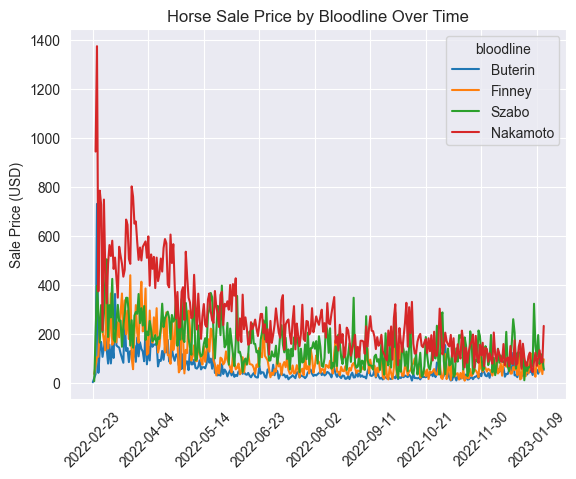

In [659]:
from matplotlib.ticker import MaxNLocator

daily = market_data_no_outliers.groupby(['day_sold','bloodline']).mean()
ax = sns.lineplot(data=daily, x='day_sold', y='converted_price', hue= 'bloodline')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.xticks(rotation=45)
ax.set(xlabel = None)
plt.ylabel('Sale Price (USD)')
plt.title('Horse Sale Price by Bloodline Over Time')

C:\Users\dgnic\AppData\Local\Temp\ipykernel_41856\1254305870.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  breed_daily = market_data_no_outliers.groupby(['day_sold','breed_type']).mean()


Text(0.5, 1.0, 'Horse Sale Price by Breed Over Time')

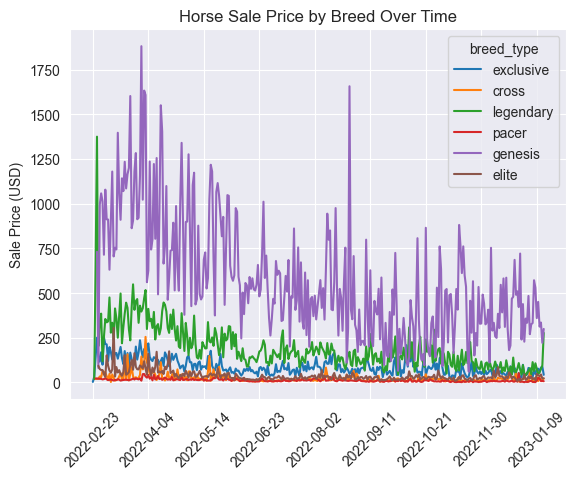

In [660]:
breed_daily = market_data_no_outliers.groupby(['day_sold','breed_type']).mean()
ax = sns.lineplot(data=breed_daily, x='day_sold', y='converted_price', hue= 'breed_type')
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both'))
plt.xticks(rotation=45)
ax.set(xlabel = None)
plt.ylabel('Sale Price (USD)')
plt.title('Horse Sale Price by Breed Over Time')

Text(0.5, 0, 'Win Rate (%)')

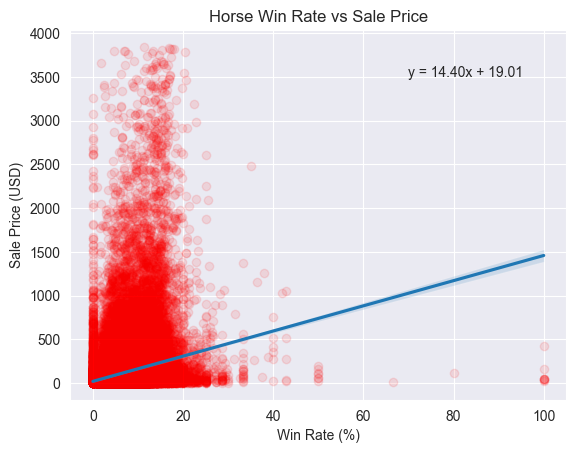

In [661]:
sns.regplot(data=market_data_no_outliers, x='win_rate', y='converted_price', scatter_kws={'alpha':0.1, 'color':'red'})

# Get the slope and intercept of the regression line
m, b = np.polyfit(market_data_no_outliers['win_rate'], market_data_no_outliers['converted_price'], 1)
# Add the equation to the plot
plt.annotate(f'y = {m:.2f}x + {b:.2f}',xy=(60,800) ,xytext=(70, 3500))
plt.title('Horse Win Rate vs Sale Price')
plt.ylabel('Sale Price (USD)')
plt.xlabel('Win Rate (%)')

## Model Fitting

### Try subsetting to recent months

In [662]:
# remove NaNs from the dataset
market_data_no_outliers = market_data_no_outliers[~pd.isna(market_data_no_outliers['converted_price'])]

In [663]:
# filter to most recent 3-4 months
# market_data_no_outliers = market_data_no_outliers[market_data_no_outliers['time_sold'] > 1661991508]
# market_data_no_outliers.sort_values('time_sold', ascending=True)
market_data_no_outliers

,Unnamed: 0.1,Unnamed: 0,time_sold,horse_id,genotype,bloodline,breed_type,color,birthday,super_coat,...,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third,converted_price,day_sold,z_score
0,15,15,1.671901e+09,270,Z1,Nakamoto,genesis,Rosy Brown,2019-03-02T09:29:40,False,...,24.63,1.760085,3.59,34,946,79,120,3046.15000,2022-12-24,2.345064
1,24,24,1.663184e+09,501,Z2,Nakamoto,genesis,Electric Violet,2019-03-15T12:08:00,False,...,22.87,0.091390,5.38,12,223,16,23,3093.96000,2022-09-14,2.384025
2,25,25,1.663610e+09,501,Z2,Nakamoto,genesis,Electric Violet,2019-03-15T12:08:00,False,...,22.87,0.091390,5.38,12,223,16,23,1801.86500,2022-09-19,1.331101
3,28,28,1.673439e+09,545,Z2,Nakamoto,genesis,Papaya Whip,2019-03-17T07:05:34,False,...,20.74,0.733313,2.82,23,815,62,84,1792.11150,2023-01-11,1.323153
4,37,37,1.655247e+09,644,Z2,Nakamoto,genesis,Brown Sugar,2019-03-20T11:32:57,False,...,24.37,0.143701,4.30,12,279,25,31,3337.74900,2022-06-14,2.582687
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
74384,74761,74761,1.673462e+09,519821,Z268,Buterin,cross,Cosmic Cobalt,2023-01-07T19:47:54,False,...,0.00,0.000000,0.00,0,8,0,0,1.38913,2023-01-11,0.136101
74385,74762,74762,1.673563e+09,519849,Z17,Buterin,elite,Oval Orchid,2023-01-07T22:27:17,False,...,18.18,0.000000,9.09,1,11,1,0,23.34585,2023-01-12,0.118208
74386,74763,74763,1.673312e+09,519892,Z12,Finney,exclusive,Midnight Black,2023-01-08T03:01:52,False,...,29.91,0.229800,13.08,14,107,11,7,66.24200,2023-01-09,0.083252
74387,74764,74764,1.673477e+09,519901,Z6,Szabo,exclusive,Dark Moss,2023-01-08T04:15:02,False,...,23.19,0.056379,8.70,6,69,6,4,11.20592,2023-01-11,0.128101


In [664]:
# clean the dataset to only include desired predictors and separate out the X and y
# X will only have continuous variables for now
X = market_data_no_outliers.drop(columns=['Unnamed: 0.1','converted_price', 'time_sold','horse_id','birthday', 'horse_id', 'mother', 'father', 'z_score', 'day_sold','bloodline', 'breed_type', 'color', 'genotype', 'horse_type', 'super_coat','Unnamed: 0'])

y = market_data_no_outliers.converted_price
X.columns

Index(['free_win_rate', 'paid_win_rate', 'place', 'total_paid', 'win_rate',
       'overall.first', 'overall.races', 'overall.second', 'overall.third'],
      dtype='object')

### Select Model Hyperparameters

In [665]:
# # following accredited to ChatGPT
#
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import GridSearchCV
#
# # Define the model
# model = LinearRegression()
#
# model.set_params(**{'fit_intercept': True, 'positive': False})
# model.get_params()
# # Define the parameter grid
# param_grid = {'fit_intercept': [True, False], 'positive': [True, False]}
#
# # Create the grid search object
# grid = GridSearchCV(model, param_grid, cv=5, return_train_score=True)
#
#
# # Fit the grid search to the data
# grid.fit(X, y)
#
# # Print the best parameters and score
# print("Best parameters: ", grid.best_params_)
# print("Best score: ", grid.best_score_)
# print("Best estimator: ", grid.best_estimator_)
# # print(f"{len(grid.feature_names_in_)} features selected out of {len(X.columns)}")
# # print('Feature names:',grid.feature_names_in_)

Best parameters:  {'fit_intercept': True, 'positive': False}
Best score:  0.2065971482329331
Best estimator:  LinearRegression()


### Test out different feature selection methods

#### Split data into test and train sets

In [666]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y ,
                                   random_state=156,
                                   test_size=0.2,
                                   shuffle=True)

#### LassoCV
'This method works well with linear models and can be used to select both continuous and categorical predictors, it's particularly useful when there are a large number of predictors in the dataset and the goal is to select a subset of the most relevant features.' - ChatGPT

In [667]:
# fit model using LassoCV for feature selection
from sklearn.linear_model import LassoCV

# Create an instance of LassoCV
lasso = LassoCV(cv=5)

# Fit the LassoCV model to the data
lasso.fit(X_train, y_train)

#  holdout scoring
result = lasso.score(X_test, y_test)
print("Holdout R2: %.2f%%" % (result*100.0))

# Get the selected features
selected_features = X.columns[lasso.coef_ != 0]
print(f'{len(selected_features)} features selected out of {len(X.columns)}: {", ".join(selected_features)}')

# get lasso score
# score = lasso.score(X, y)
# print(f'Model score is: {score}')



Holdout R2: 19.31%
7 features selected out of 9: free_win_rate, paid_win_rate, place, overall.first, overall.races, overall.second, overall.third


In [668]:
# Get a single data point from the DataFrame
data_point = X.iloc[15,:]
print(data_point)

# Make a prediction for the data point
prediction = lasso.predict(data_point.values.reshape(1, -1))
print(prediction)
X

free_win_rate       7.070000
paid_win_rate       0.000000
place              34.630000
total_paid          0.087705
win_rate            6.830000
overall.first      14.000000
overall.races     205.000000
overall.second     19.000000
overall.third      38.000000
Name: 15, dtype: float64
[204.83948789]


C:\Users\dgnic\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:409: UserWarning: X does not have valid feature names, but LassoCV was fitted with feature names
  warnings.warn(


,free_win_rate,paid_win_rate,place,total_paid,win_rate,overall.first,overall.races,overall.second,overall.third
0,6.02,1.25,24.63,1.760085,3.59,34,946,79,120
1,5.71,0.00,22.87,0.091390,5.38,12,223,16,23
2,5.71,0.00,22.87,0.091390,5.38,12,223,16,23
3,3.49,0.94,20.74,0.733313,2.82,23,815,62,84
4,4.91,1.82,24.37,0.143701,4.30,12,279,25,31
...,...,...,...,...,...,...,...,...,...
74384,0.00,0.00,0.00,0.000000,0.00,0,8,0,0
74385,10.00,0.00,18.18,0.000000,9.09,1,11,1,0
74386,7.32,16.67,29.91,0.229800,13.08,14,107,11,7
74387,11.76,5.71,23.19,0.056379,8.70,6,69,6,4


## Linear Regression Score

In [669]:
# scoring with k-fold validation -> best accuracy so far 21.05

from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=100, shuffle=True)
results_kfold = sklearn.model_selection.cross_val_score(lasso, X, y, cv=kfold)
print("Accuracy: %.2f%%" % (results_kfold.mean()*100.0))

Accuracy: 21.05%


## Random Forest Regressor
### Try to get best hyperparameters

In [674]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV


# Initialize the model
regr = RandomForestRegressor(random_state=0)

# # Define the parameter grid
# param_grid = {'n_estimators': [50, 100, 200],
#               'max_depth': [3, 5, 7],
#               'min_samples_split': [2, 4, 6],
#               'min_samples_leaf': [1, 2, 4]}
#
# # Initialize the GridSearchCV object
# grid_search = GridSearchCV(regr, param_grid, cv=5)
#
# # Fit the GridSearchCV object to the data
# grid_search.fit(X_train, y_train)
#
# # Print the best set of hyperparameters
# print("Best set of hyperparameters: ", grid_search.best_params_)

KeyboardInterrupt: 

### Fit model

In [671]:
regr.fit(X_train, y_train)
score = regr.score(X_test, y_test)

print(f'Simple Model score is: {score}')

Simple Model score is: 0.3437078624752118


In [673]:
# regr_kfold = sklearn.model_selection.cross_val_score(regr, X, y, cv=kfold)
# print("Accuracy: %.2f%%" % (regr_kfold.mean()*100.0))

# K-fold validation Accuracy: 38.25%

Accuracy: 38.25%


## Try polynomial regression